# Labor 1

In [1]:
import IPython
import wave
import matplotlib.pyplot as plt 
import numpy as np
import math
import random
from scipy.io.wavfile import read

## b) Audio File Dies ist eine Suchmaschine

In [2]:
IPython.display.Audio("audio/Suchmaschine1.wav")

## Audio als Funktion der Zeit

Parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39936, comptype='NONE', compname='not compressed')


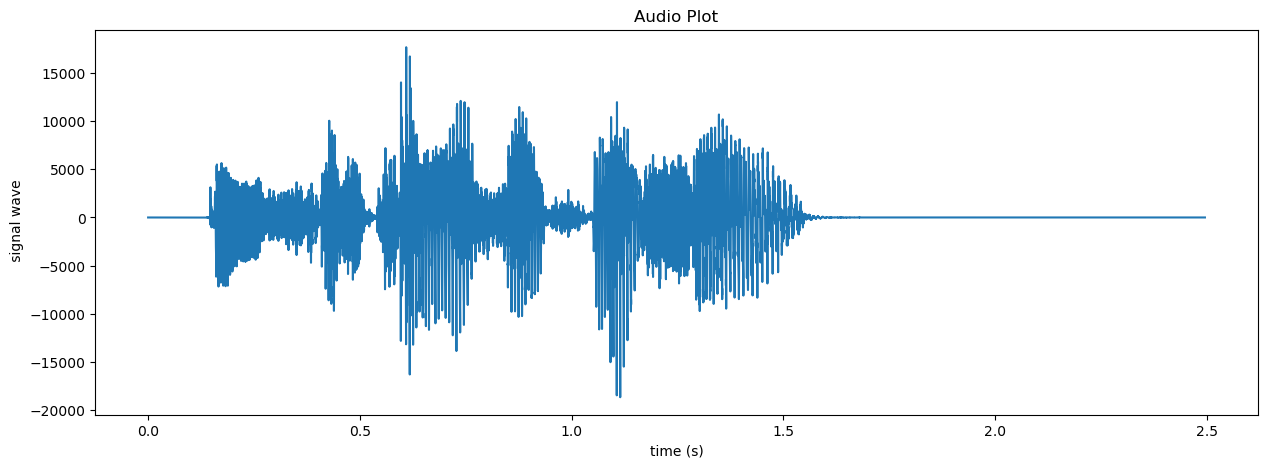

In [3]:
def plot(path):
    
    obj = wave.open(path, 'rb')
    print('Parameters:', obj.getparams())
    sample_freq = obj.getframerate()
    n_samples = obj.getnframes()
    signal_wave = obj.readframes(-1)
    duration = n_samples/sample_freq

    #y-axe
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    
    #x-axe
    time = np.linspace(0, duration, num=n_samples)

    plt.figure(figsize=(15, 5))
    plt.plot(time, signal_array)
    plt.title('Audio Plot')
    plt.ylabel(' signal wave')
    plt.xlabel('time (s)')
    plt.show()
plot('audio/Suchmaschine1.wav');

## Analyse der Funktion

Die hohen Auschläge in y-Richtung zeigen wann Wörter betohnt wurden und anhand der Frequenzen nahe null erkennt man wo Pausen gemacht worden sind. So lässt sich erkennen, dass von 0,15s bis 1,4s das word Dies  dargestellt wird. Danach steigt die Funktion wieder rapide und es wird das Wort ist bis 0,6s dargestellt. Das Wort eine folgt danach bis ca. 0,65 hier sinkt die Funktion wieder rapide was auf das Wort Ende hindeutet. Im nächsten Moment sehen wir die Höchstefrequenz die bis ca 0,75s die Silbe Such darstellt. Die Funktion steigt wieder und man erkennt bis 1,1s die Silbe ma. Bis 1,2 geht der lautere laut sch und bis 1,3 der vokal i. Darauf folgt nur noch bis 1,6 die Silbe ne.

## c) Harmonische Signale

### Kammerton + 2 und 3 Harmonische

Parameters: _wave_params(nchannels=1, sampwidth=2, framerate=8800, nframes=8800, comptype='NONE', compname='not compressed')


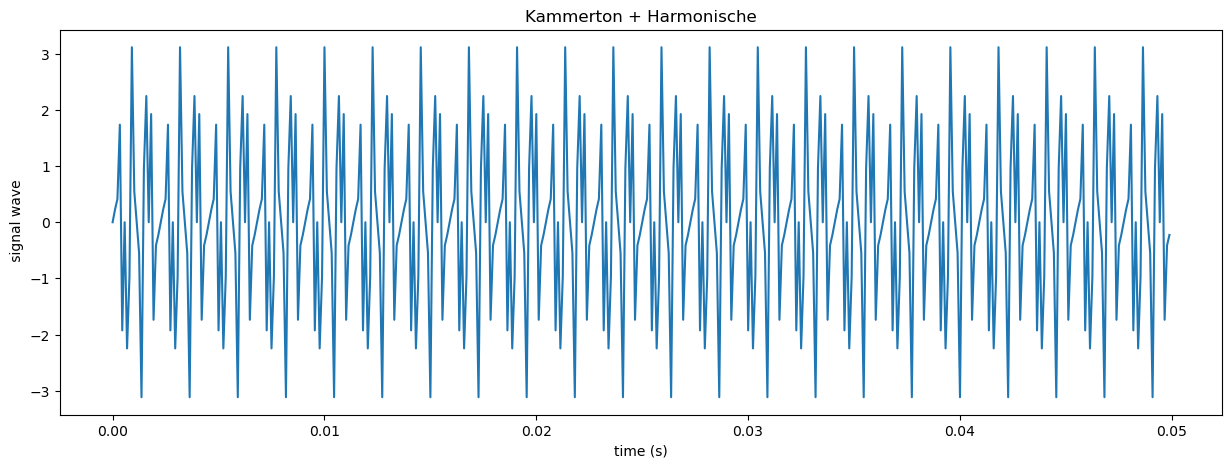

In [4]:
# Parameter definieren
sampling_rate = 8800
duration = 1  # Sekunden
amplitude = 1

# Frequenzen definieren
frequencies = [440, 3*440, 4*440]

# Anzahl der Frames berechnen
num_frames = int(sampling_rate * duration)

# Zeitarray erstellen
time = np.linspace(0, duration, num_frames, endpoint=False)

# Wellenformen für jede Frequenz erstellen und addieren
signal = np.sum([amplitude * np.sin(2 * np.pi * f * time) for f in frequencies], axis=0)

# Wave-Datei erstellen und öffnen
output_file = "generatedAudio/kammerton2und3.wav"
with wave.open(output_file, 'w') as wave_file:
    wave_file.setnchannels(1)  # Mono
    wave_file.setsampwidth(2)   # 2 Bytes pro Sample für Int16
    wave_file.setframerate(sampling_rate)
    wave_file.setnframes(num_frames)
    wave_file.setcomptype('NONE', 'not compressed')
    
    # Daten in die Wave-Datei schreiben (als Bytes)
    wave_file.writeframes(np.array(signal * 32767, dtype=np.int16).tobytes())

obj = wave.open("generatedAudio/kammerton2und3.wav", 'rb')
print('Parameters:', obj.getparams())
sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)
duration = n_samples/sample_freq

#y-axe
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

#x-axe
time = np.linspace(0, duration, num=n_samples)
end_index = int(sample_freq * 0.05)  # Anzahl der Samples für 0,05 Sekunden
time = time[:end_index]
signal_array = signal_array[:end_index]/10000


plt.figure(figsize=(15, 5))
plt.plot(time, signal_array)
plt.title('Kammerton + Harmonische')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')
plt.show()
IPython.display.Audio("generatedAudio/kammerton2und3.wav")


## Kammerton

Parameters: _wave_params(nchannels=1, sampwidth=2, framerate=8800, nframes=8800, comptype='NONE', compname='not compressed')


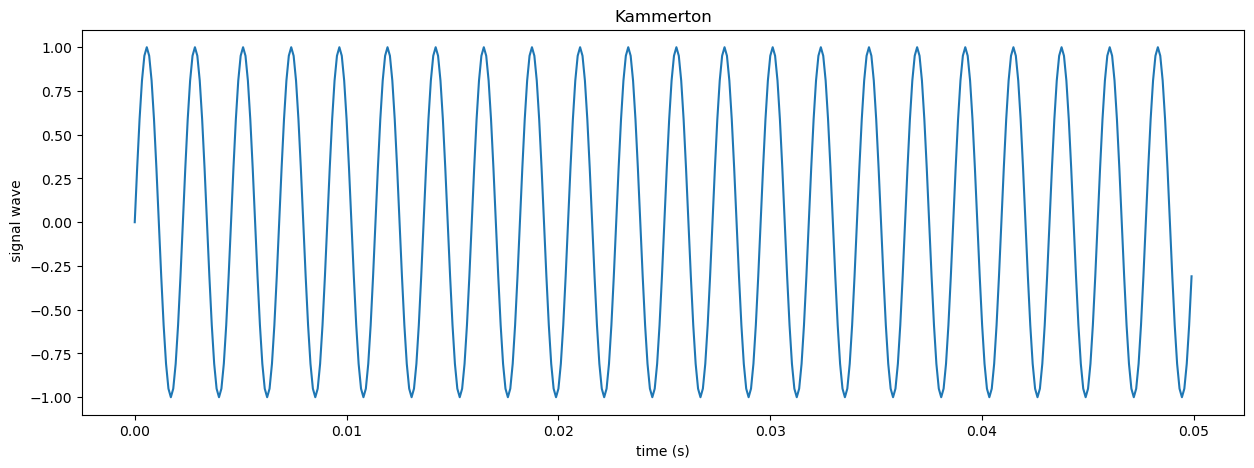

In [5]:
# Parameter definieren
sampling_rate = 8800
duration = 1  # Sekunden
amplitude = 1

# Frequenzen definieren
frequencies = [440]

# Anzahl der Frames berechnen
num_frames = int(sampling_rate * duration)

# Zeitarray erstellen
time = np.linspace(0, duration, num_frames, endpoint=False)

# Wellenformen für jede Frequenz erstellen und addieren
signal = np.sum([amplitude * np.sin(2 * np.pi * f * time) for f in frequencies], axis=0)

# Wave-Datei erstellen und öffnen
output_file = "generatedAudio/kammerton.wav"
with wave.open(output_file, 'w') as wave_file:
    wave_file.setnchannels(1)  # Mono
    wave_file.setsampwidth(2)   # 2 Bytes pro Sample für Int16
    wave_file.setframerate(sampling_rate)
    wave_file.setnframes(num_frames)
    wave_file.setcomptype('NONE', 'not compressed')
    
    # Daten in die Wave-Datei schreiben (als Bytes)
    wave_file.writeframes(np.array(signal * 32767, dtype=np.int16).tobytes())

    
obj = wave.open("generatedAudio/kammerton.wav", 'rb')
print('Parameters:', obj.getparams())
sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)
duration = n_samples/sample_freq

#y-axe
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
signal_array = signal_array / np.max(np.abs(signal_array))
#x-axe
time 
end_index = int(sample_freq * 0.05)  # Anzahl der Samples für 0,05 Sekunden
time = time[:end_index]
signal_array = signal_array[:end_index]
plt.figure(figsize=(15, 5))
plt.plot(time, signal_array)
plt.title('Kammerton')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')
plt.show()

IPython.display.Audio("generatedAudio/kammerton.wav")

## d) Zufällige Phasenverschiebung

Parameters: _wave_params(nchannels=1, sampwidth=2, framerate=8800, nframes=8800, comptype='NONE', compname='not compressed')


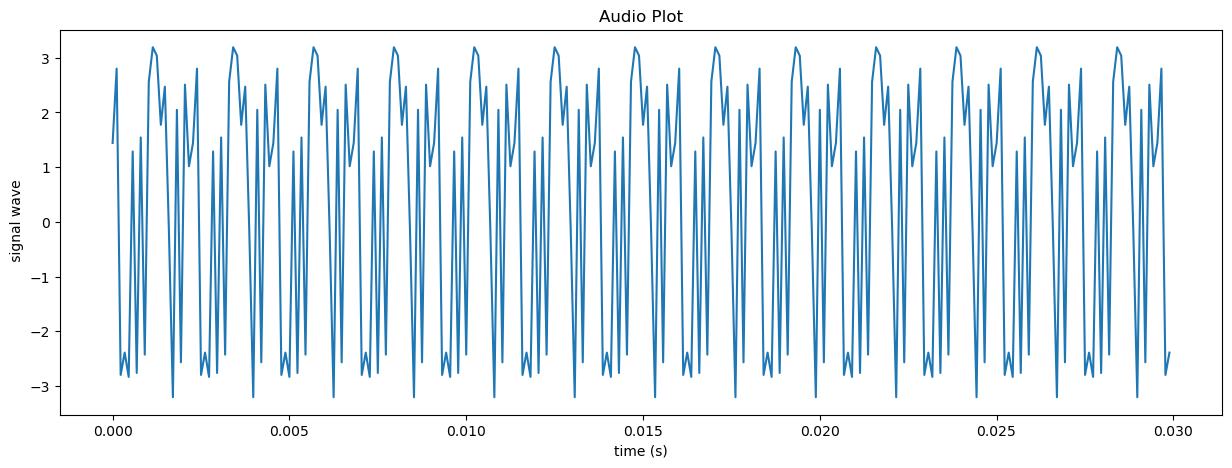

In [6]:
# Parameter definieren
sampling_rate = 8800
duration = 1  # Sekunden
amplitude = 1
phase = [2/random.randint(1, 10) * np.pi, 2/random.randrange(1,10) * np.pi, 2/random.randrange(1,10) * np.pi]


# Frequenzen definieren
frequencies = [440, 3*440, 4*440]

# Anzahl der Frames berechnen
num_frames = int(sampling_rate * duration)

# Zeitarray erstellen
time = np.linspace(0, duration, num_frames, endpoint=False)

# Wellenformen für jede Frequenz erstellen und addieren
signal = np.sum([amplitude * np.sin(2 * np.pi * f * time + p) for f, p in zip(frequencies, phase)], axis=0)

# Wave-Datei erstellen und öffnen
output_file = "generatedAudio/kammerton2und3verschoben.wav"
with wave.open(output_file, 'w') as wave_file:
    wave_file.setnchannels(1)  # Mono
    wave_file.setsampwidth(2)   # 2 Bytes pro Sample für Int16
    wave_file.setframerate(sampling_rate)
    wave_file.setnframes(num_frames)
    wave_file.setcomptype('NONE', 'not compressed')
    
    # Daten in die Wave-Datei schreiben (als Bytes)
    wave_file.writeframes(np.array(signal * 32767, dtype=np.int16).tobytes())

    
obj = wave.open("generatedAudio/kammerton2und3verschoben.wav", 'rb')
print('Parameters:', obj.getparams())
sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)
duration = n_samples/sample_freq

#y-axe
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

#x-axe
time = np.linspace(0, duration, num=n_samples)
end_index = int(sample_freq * 0.03)  # Anzahl der Samples für 0,05 Sekunden
time = time[:end_index]
signal_array = signal_array[:end_index]/10000


plt.figure(figsize=(15, 5))
plt.plot(time, signal_array)
plt.title('Audio Plot')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')
plt.show()

IPython.display.Audio("generatedAudio/kammerton2und3verschoben.wav")


## Auswertung
- Es ist eine deutlich sichtbare Veränderung erkennbar. Durch die Phasenänderung ändern sich die Interferenzmuster zwischen den Frequenzen.
- Auch ist ein hörbarer Unterschied erkennbar, da sich die Klangfarbe verändert.

## e) Auslöschung des Signals

Parameters: _wave_params(nchannels=1, sampwidth=2, framerate=8800, nframes=8800, comptype='NONE', compname='not compressed')


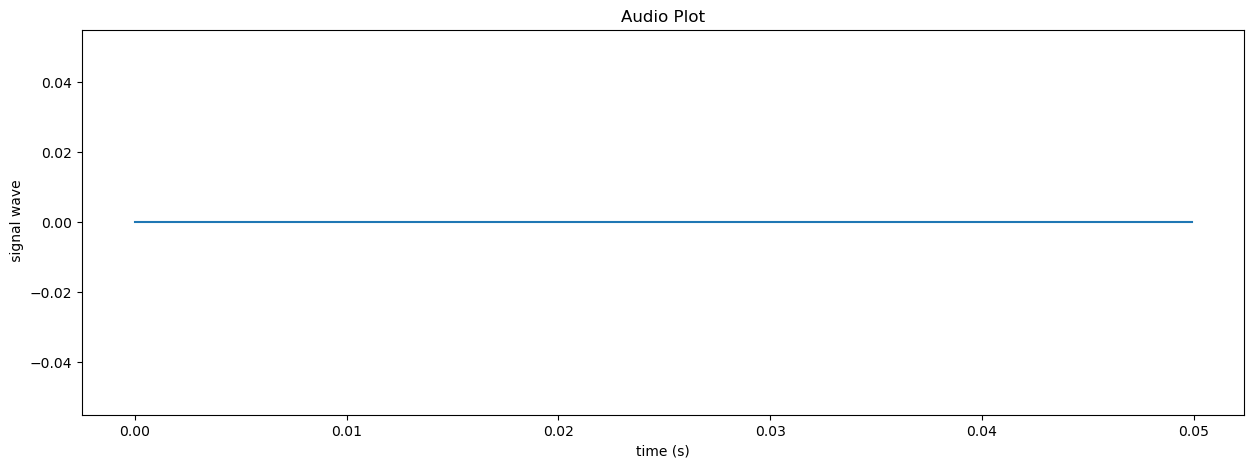

In [7]:
# Parameter definieren
sampling_rate = 8800
duration = 1  # Sekunden
amplitude = 1
phase = [0, np.pi]


# Frequenzen definieren
frequencies = [440, 440]

# Anzahl der Frames berechnen
num_frames = int(sampling_rate * duration)

# Zeitarray erstellen
time = np.linspace(0, duration, num_frames, endpoint=False)

# Wellenformen für jede Frequenz erstellen und addieren
signal = np.sum([amplitude * np.sin(2 * np.pi * f * time + p) for f, p in zip(frequencies, phase)], axis=0)

# Wave-Datei erstellen und öffnen
output_file = "generatedAudio/kammerton2und3verschoben.wav"
with wave.open(output_file, 'w') as wave_file:
    wave_file.setnchannels(1)  # Mono
    wave_file.setsampwidth(2)   # 2 Bytes pro Sample für Int16
    wave_file.setframerate(sampling_rate)
    wave_file.setnframes(num_frames)
    wave_file.setcomptype('NONE', 'not compressed')
    
    # Daten in die Wave-Datei schreiben (als Bytes)
    wave_file.writeframes(np.array(signal * 32767, dtype=np.int16).tobytes())

    
obj = wave.open("generatedAudio/kammerton2und3verschoben.wav", 'rb')
print('Parameters:', obj.getparams())
sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)
duration = n_samples/sample_freq

#y-axe
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

#x-axe
time = np.linspace(0, duration, num=n_samples)
end_index = int(sample_freq * 0.05)  # Anzahl der Samples für 0,05 Sekunden
time = time[:end_index]
signal_array = signal_array[:end_index]/10000


plt.figure(figsize=(15, 5))
plt.plot(time, signal_array)
plt.title('Audio Plot')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')
plt.show()

IPython.display.Audio("generatedAudio/kammerton2und3verschoben.wav")


## f) Rechteckfunktion mit den Harmonischen

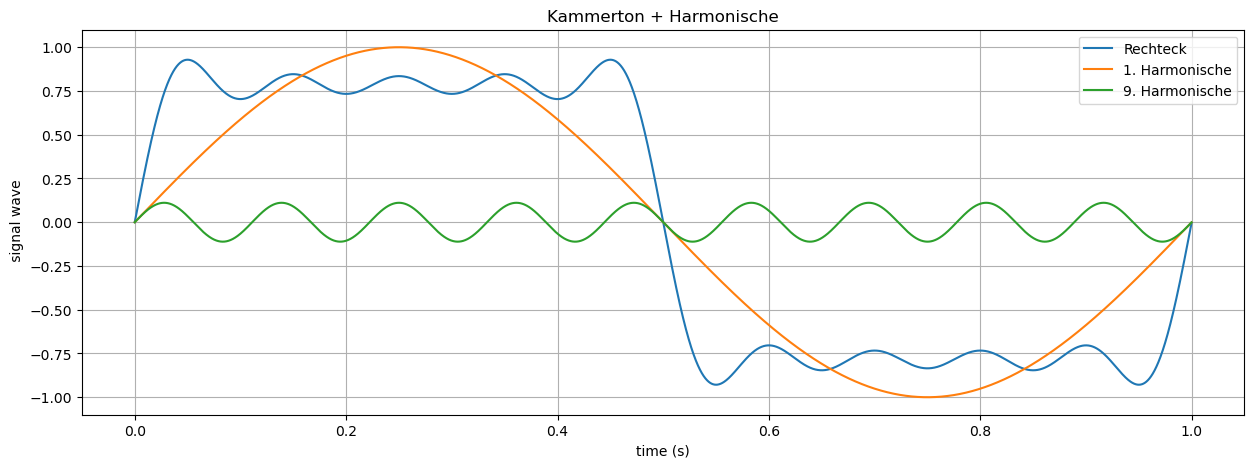

In [8]:
# Parameter definieren
sampling_rate = 8000
duration = 1  # Sekunden
amplitude = 1

# Frequenzen definieren
frequencies = [1, 3, 5,7,9]

# Anzahl der Frames berechnen
num_frames = int(sampling_rate * duration)

# Zeitarray erstellen
time = np.linspace(0, duration, num_frames, endpoint=False)

# Wellenformen für jede Frequenz erstellen und addieren
signal = np.sum([amplitude * np.sin(2 * np.pi * f * time)/f for f in frequencies], axis=0)



# 1. Harmonische
first_harmonic = amplitude *np.sin(2 * np.pi *   time) 

# 9. Harmonische
ninth_harmonic = amplitude *np.sin(2 * np.pi * 9 * time) / 9

plt.figure(figsize=(15, 5))
plt.plot(time, signal, label='Rechteck')
plt.plot(time, first_harmonic, label='1. Harmonische')
plt.plot(time, ninth_harmonic, label='9. Harmonische')
plt.title('Kammerton + Harmonische')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')
plt.legend()
plt.grid(True)
plt.show()



- Die erste Harmonische Funktion bestimmt die Grundperiode der Rechteckfunktion un enthält den Haubtteil des Energieinhalts.
- Die 9 Harmonische modeliert die Kanten und sorgt für schärfere Details.
würden nach mehr Harmonische Frequenzen hinzugefügt werden wäre die Rechteckfunktion noch schärfer.

## g) Rechteckfunktion 440hz

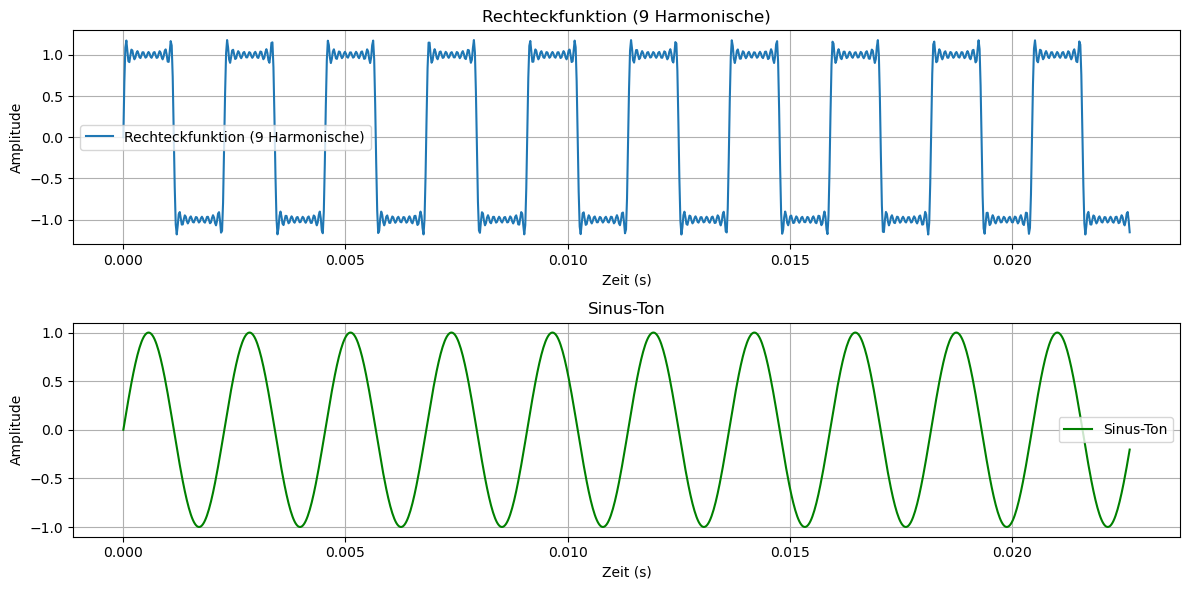

Spiele Rechteckfunktion...


Spiele Sinus-Ton...


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import write
import IPython.display as ipd


f0 = 440  
T0 = 1 / f0  
A = 1  # Amplitude
fs = 44100 
N = 9  # Anzahl der Harmonischen für die Rechteckfunktion
Dauer = 2  # Dauer in Sekunden
t = np.linspace(0, Dauer, int(fs * Dauer), endpoint=False)  # Zeitvektor

# Funktion zur Erzeugung der Rechteckfunktion mittels Fourier-Reihe
def rechteckfunktion(t, f0, N, A):
    x = np.zeros_like(t)
    for k in range(N):
        harmonische = np.sin(2 * np.pi * (2*k + 1) * f0 * t) / (2*k + 1)
        x += harmonische
    x *= (4 * A) / np.pi
    return x

# Erzeugen der Rechteckfunktion mit 9 Harmonischen
rechteck_welle = rechteckfunktion(t, f0, N, A)

# Erzeugen des reinen Sinustons
sinus_welle = A * np.sin(2 * np.pi * f0 * t)


# Speichern der Wellenformen in WAV-Dateien
write('generatedAudio/rechteck_welle.wav', fs, rechteck_welle.astype(np.float32))
write('generatedAudio/sinus_welle.wav', fs, sinus_welle.astype(np.float32))

# Plotten der Wellenformen
plt.figure(figsize=(12, 6))

# Plotten der Rechteckfunktion
plt.subplot(2, 1, 1)
plt.plot(t[:1000], rechteck_welle[:1000], label='Rechteckfunktion (9 Harmonische)')
plt.title('Rechteckfunktion (9 Harmonische)')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plotten des Sinustons
plt.subplot(2, 1, 2)
plt.plot(t[:1000], sinus_welle[:1000], 'g', label='Sinus-Ton')
plt.title('Sinus-Ton')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Abspielen der Klänge mit IPython.display.Audio
print("Spiele Rechteckfunktion...")
ipd.display(ipd.Audio('generatedAudio/rechteck_welle.wav'))

print("Spiele Sinus-Ton...")
ipd.display(ipd.Audio('generatedAudio/sinus_welle.wav'))


- Die Reine Sinusfunktion hat einen einfachen und glatteren Ton, da er nur aus einer Grundfrequenz besteht
- Wobei die Rechteckfunktion einen komplexeren und reichhaltigeren Klang hat, da sie aus mehreren Frequenzen besteht.